In [2]:
import os, sys
sys.path.append('/rds/general/user/tla19/home/FYP/MAax')

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read JSON files
with open('batch_times_avg_100.json', 'r') as f1, open('ant_batch_times_1000.json', 'r') as f2, open('batch_times_no_walls_1000.json', 'r') as f3:
    wall_data = json.load(f1)
    ant_data = json.load(f2)
    no_wall_data = json.load(f3)

In [5]:
# Process data
x_values = list(wall_data.keys())
ant_mean_values = []
ant_std_values = []
wall_mean_values = []
wall_std_values = []
no_mean_values = []
no_std_values = []



for x in x_values:
    ant_times = ant_data[x][1:]  # Discard the first entry
    wall_times = wall_data[x][1:]  # Discard the first entry
    no_times = no_wall_data[x][1:]  # Discard the first entry
    wall_times = 10 * np.asarray(wall_times)
    print(wall_times)
    
    ant_mean = np.mean(ant_times)
    ant_std = np.std(ant_times)
    wall_mean = np.mean(wall_times)
    wall_std = np.std(wall_times)
    no_mean = np.mean(no_times)
    no_std = np.std(no_times)
    
    ant_mean_values.append(ant_mean)
    ant_std_values.append(ant_std)
    wall_mean_values.append(wall_mean)
    wall_std_values.append(wall_std)
    no_mean_values.append(no_mean)
    no_std_values.append(no_std)
    

[13.22883844 13.65170956 13.44090939 13.44149351 13.39934587]
[12.76468277 12.91450024 12.9511857  12.93527126 12.90997267]
[12.78265238 12.96717167 12.87584066 12.73182154 12.75055647]
[23.41872692 23.60827446 23.44659805 23.42917681 23.41669559]
[38.40590477 38.33111763 38.23258877 38.34939718 38.22561026]
[67.82907486 67.80097008 67.81585932 67.7285099  67.84457684]
[126.77608252 126.51003838 126.48861647 126.58345938 126.6090107 ]
[244.08145666 243.96121979 243.96773577 244.03215647 243.8688755 ]
[478.70509863 478.73363018 478.68700504 478.81362677 478.71735096]


In [6]:
# Process evals per sec
ant_eval_mean_values = []
ant_eval_std_values = []
wall_eval_mean_values = []
wall_eval_std_values = []
no_eval_mean_values = []
no_eval_std_values = []

eval_batch_sizes = x_values

for x in eval_batch_sizes:
    ant_times = np.asarray(ant_data[str(x)][1:])  # Discard the first entry
    wall_times = np.asarray(wall_data[str(x)][1:])  # Discard the first entry
    wall_times = 10 * np.asarray(wall_times)
    no_times = np.asarray(no_wall_data[str(x)][1:])  # Discard the first entry
    
    ant_evals_per_sec = (1000 * int(x)) / ant_times
    wall_evals_per_sec = (1000 * int(x)) / wall_times
    no_evals_per_sec = (1000 * int(x)) / no_times
    
    ant_mean = np.mean(ant_evals_per_sec)
    ant_std = np.std(ant_evals_per_sec)
    wall_mean = np.mean(wall_evals_per_sec)
    wall_std = np.std(wall_evals_per_sec)
    no_mean = np.mean(no_evals_per_sec)
    no_std = np.std(no_evals_per_sec)
    
    ant_eval_mean_values.append(ant_mean)
    ant_eval_std_values.append(ant_std)
    wall_eval_mean_values.append(wall_mean)
    wall_eval_std_values.append(wall_std)
    no_eval_mean_values.append(no_mean)
    no_eval_std_values.append(no_std)

print("Eval mean: ", ant_eval_mean_values)

Eval mean:  [217.31237001942768, 427.028390719413, 839.0581225911637, 1585.6303541077987, 2801.4617196285403, 5158.636324095482, 7730.842181940467, 10115.309353138964, 10023.311504564237]


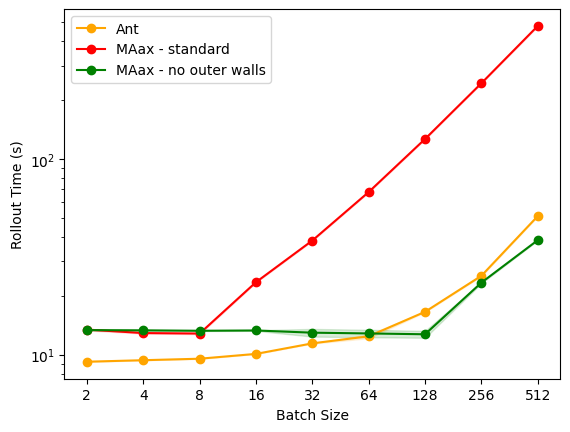

In [7]:
# Plotting
plt.plot(x_values, ant_mean_values, label="Ant", marker='o', color='orange')
plt.plot(x_values, wall_mean_values, label="MAax - standard", marker='o', color='red')
plt.plot(x_values, no_mean_values, label="MAax - no outer walls", marker='o', color='green')
plt.fill_between(x_values, np.array(ant_mean_values) - np.array(ant_std_values),
                 np.array(ant_mean_values) + np.array(ant_std_values),
                 alpha=0.15, color='orange')
plt.fill_between(x_values, np.array(wall_mean_values) - np.array(wall_std_values),
                 np.array(wall_mean_values) + np.array(wall_std_values),
                 alpha=0.15, color='red')
plt.fill_between(x_values, np.array(no_mean_values) - np.array(no_std_values),
                 np.array(no_mean_values) + np.array(no_std_values),
                 alpha=0.15, color='green')
plt.xlabel('Batch Size')
plt.ylabel('Rollout Time (s)')
plt.yscale("log")
plt.legend()
plt.savefig('batch_rollout.png')
plt.show()

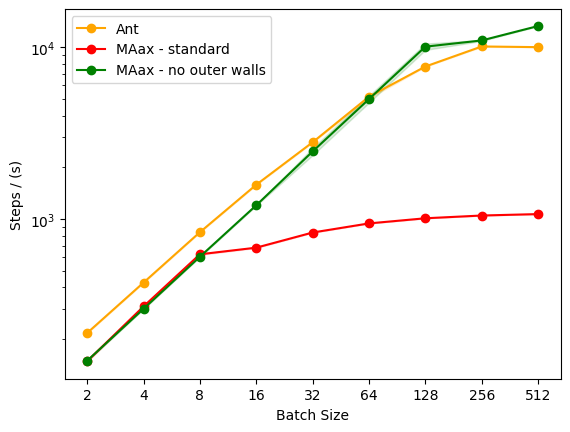

In [8]:
# Plotting
plt.plot(eval_batch_sizes, ant_eval_mean_values, label="Ant", marker='o', color='orange')
plt.plot(eval_batch_sizes, wall_eval_mean_values, label="MAax - standard", marker='o', color='red')
plt.plot(eval_batch_sizes, no_eval_mean_values, label="MAax - no outer walls", marker='o', color='green')
plt.fill_between(eval_batch_sizes, np.array(ant_eval_mean_values) - np.array(ant_eval_std_values),
                 np.array(ant_eval_mean_values) + np.array(ant_eval_std_values),
                 alpha=0.15, color='orange')
plt.fill_between(eval_batch_sizes, np.array(wall_eval_mean_values) - np.array(wall_eval_std_values),
                 np.array(wall_eval_mean_values) + np.array(wall_eval_std_values),
                 alpha=0.15, color='red')
plt.fill_between(eval_batch_sizes, np.array(no_eval_mean_values) - np.array(no_eval_std_values),
                 np.array(no_eval_mean_values) + np.array(no_eval_std_values),
                 alpha=0.15, color='green')
plt.xlabel('Batch Size')
plt.ylabel('Steps / (s)')
plt.yscale("log")
plt.legend()
plt.savefig('batch_steps.png')
plt.show()

In [10]:
print(wall_eval_mean_values)
print(ant_eval_mean_values)
print(no_eval_mean_values)
print("\n")


print(np.max(wall_eval_mean_values))
print(np.max(ant_eval_mean_values))
print(np.max(no_eval_mean_values))


[148.9080228297898, 310.20320558473134, 623.9759719238012, 681.9053044273235, 835.317280800937, 943.9002582759064, 1011.1114836542845, 1049.2565810648398, 1069.4933860482604]
[217.31237001942768, 427.028390719413, 839.0581225911637, 1585.6303541077987, 2801.4617196285403, 5158.636324095482, 7730.842181940467, 10115.309353138964, 10023.311504564237]
[149.79157160827103, 300.46391947682434, 603.907625642943, 1203.797707828267, 2475.9542096948503, 4996.256093985413, 10087.233425523507, 10966.379603273163, 13302.515479471545]


1069.4933860482604
10115.309353138964
13302.515479471545
